<a href="https://colab.research.google.com/github/YakshRathod/NULLCLASS-Internship/blob/Task-4/Task_4_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----- CLASS DISTRIBUTION SUMMARY -----
   Flower Name  Image_Count
       petunia          234
passion flower          226
    wallflower          175
    watercress          169
    water lily          166
          rose          157
    frangipani          153
      foxglove          146
      cyclamen          141
   lotus lotus          123
      hibiscus          117
    sword lily          114
 bougainvillea          114
barbeton daisy          113
   thorn apple          107
Total classes: 102 (full table available on request)


/tmp/ipython-input-2337841159.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Image_Count', y='Flower Name', data=bar_table, palette='viridis')


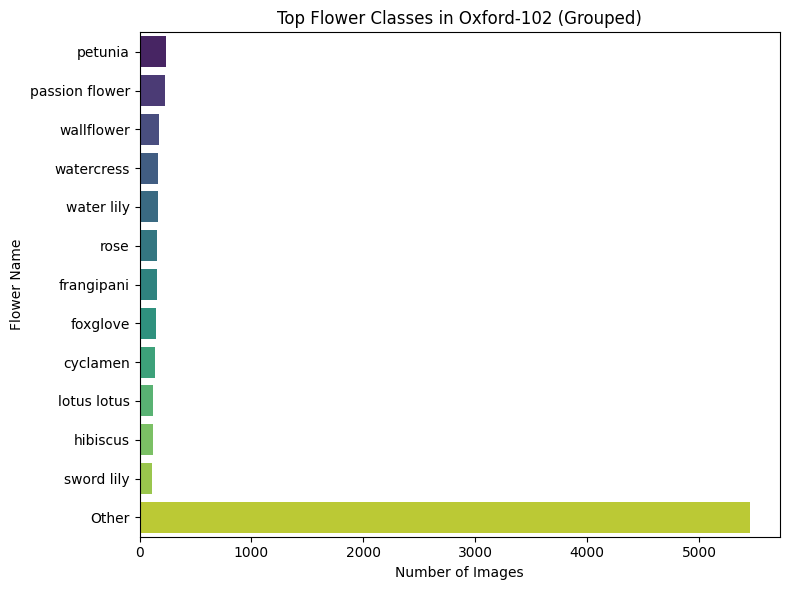

----- CLASS LABEL LENGTH SUMMARY -----
Words in Name
1    38
2    56
3     5
4     3


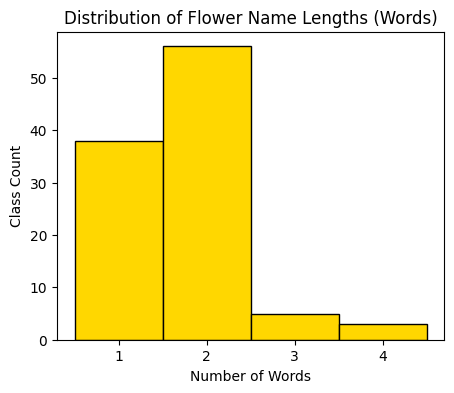

----- IMAGE RESOLUTION FREQUENCY TABLE -----
 Resolution  Count
 (667, 500)   1336
 (752, 500)    752
 (666, 500)    311
 (750, 500)    228
 (500, 667)    186
 (500, 752)    113
 (667, 501)     82
 (625, 500)     67
 (500, 500)     65
 (751, 500)     65
 (668, 500)     62
 (500, 750)     48
 (500, 666)     47
 (669, 500)     46
 (626, 500)     41
 (624, 500)     35
 (500, 625)     30
 (747, 500)     26
 (701, 500)     25
 (749, 500)     24
 (663, 500)     24
 (500, 751)     24
 (627, 500)     24
 (664, 500)     24
 (753, 501)     22
 (700, 500)     21
 (754, 500)     20
 (670, 500)     20
 (671, 500)     19
 (500, 626)     18
 (718, 500)     16
 (699, 500)     16
 (748, 500)     16
 (755, 500)     15
 (529, 500)     15
 (665, 500)     15
 (506, 500)     14
 (661, 500)     14
 (600, 500)     14
 (500, 627)     14
 (702, 500)     14
 (500, 749)     14
 (641, 500)     14
 (731, 500)     14
 (680, 500)     13
 (550, 500)     13
 (623, 500)     13
 (644, 500)     13
 (634, 500)     13
 (673

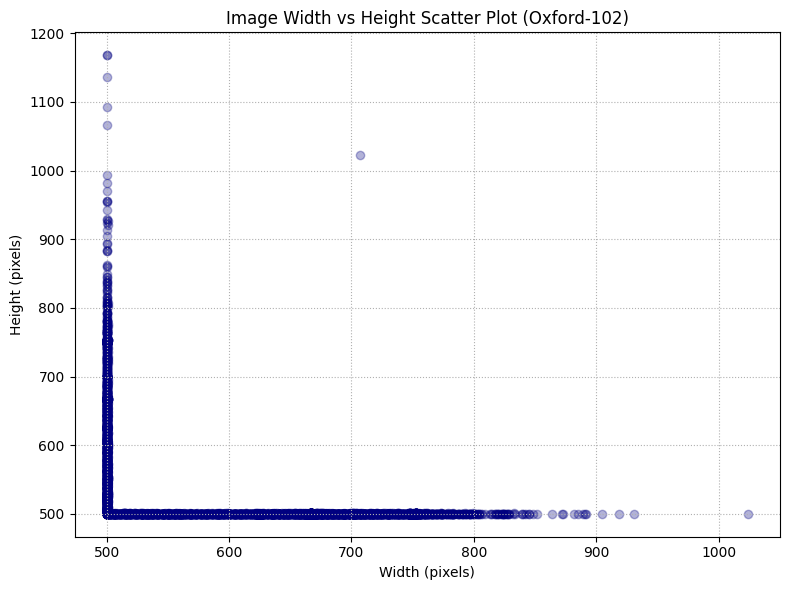

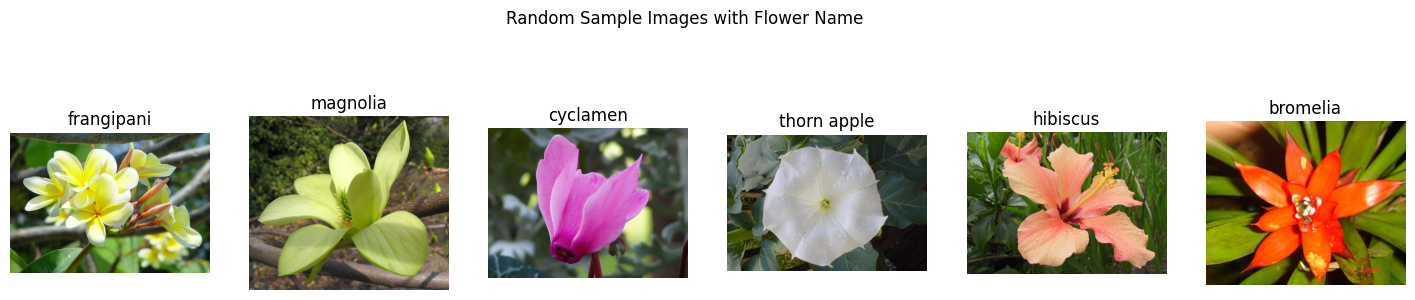

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from collections import Counter
import json
import seaborn as sns

# --- Paths ---
base_dir = '/content/drive/MyDrive/Nullclass internship/Task 4/Oxford flowers 102/dataset'
splits = ['train', 'valid', 'test']
img_dirs = [os.path.join(base_dir, split) for split in splits]
cat_to_name_path = '/content/drive/MyDrive/Nullclass internship/Task 4/Oxford flowers 102/cat_to_name.json'

# --- Load class names ---
with open(cat_to_name_path, 'r') as f:
    cat_to_name = json.load(f)
class_names = [cat_to_name[str(i+1)] for i in range(102)]

# --- Collect all image file paths and associated labels ---
img_files = []
labels = []
for split in splits:
    split_dir = os.path.join(base_dir, split)
    for class_num in sorted(os.listdir(split_dir)):
        class_dir = os.path.join(split_dir, class_num)
        if not os.path.isdir(class_dir): continue
        files = [os.path.join(class_dir, fn) for fn in os.listdir(class_dir) if fn.lower().endswith('.jpg')]
        img_files.extend(files)
        labels.extend([int(class_num)-1]*len(files))  # minus 1 for 0-based

# --- 1. CLASS DISTRIBUTION ---
class_counts = Counter(labels)
class_dist_table = pd.DataFrame({
    'Flower Name': [class_names[i] for i in range(102)],
    'Image_Count': [class_counts[i] for i in range(102)]
})
print("----- CLASS DISTRIBUTION SUMMARY -----")
print(class_dist_table.sort_values('Image_Count', ascending=False).head(15).to_string(index=False))
print(f"Total classes: {len(class_names)} (full table available on request)")

plt.figure(figsize=(8, 6))
top_n = 12
top_classes = class_dist_table.sort_values('Image_Count', ascending=False).head(top_n)
other_sum = class_dist_table.sort_values('Image_Count', ascending=False).iloc[top_n:]['Image_Count'].sum()
bar_table = pd.concat([top_classes, pd.DataFrame({'Flower Name': ['Other'], 'Image_Count': [other_sum]})])
sns.barplot(x='Image_Count', y='Flower Name', data=bar_table, palette='viridis')
plt.title("Top Flower Classes in Oxford-102 (Grouped)")
plt.xlabel("Number of Images")
plt.ylabel("Flower Name")
plt.tight_layout()
plt.show()

# --- 2. CLASS LABEL LENGTH STATS ---
name_lens = [len(name.split()) for name in class_names]
lens_table = pd.DataFrame({'Flower Name': class_names, 'Words in Name': name_lens})
print("----- CLASS LABEL LENGTH SUMMARY -----")
lens_summary = lens_table['Words in Name'].value_counts().sort_index()
print(lens_summary.to_string())
plt.figure(figsize=(5, 4))
plt.hist(name_lens, bins=np.arange(1, max(name_lens) + 2) - 0.5, color='gold', edgecolor='black')
plt.title("Distribution of Flower Name Lengths (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Class Count")
plt.xticks(range(1, max(name_lens) + 1))
plt.show()

# --- 3. IMAGE RESOLUTION: SCATTER PLOT + TABLE ---
print("----- IMAGE RESOLUTION FREQUENCY TABLE -----")
resolutions = []
for f in img_files:
    try:
        with Image.open(f) as img:
            resolutions.append(img.size)
    except Exception as e:
        print(f"Error loading {f}: {e}")

# Table: frequency of each unique (width, height)
res_counter = Counter(resolutions)
res_df = pd.DataFrame(list(res_counter.items()), columns=['Resolution', 'Count'])
res_df = res_df.sort_values("Count", ascending=False)
print(res_df.to_string(index=False))

# Scatter plot: each image = 1 point in (width, height)
widths, heights = zip(*resolutions)
plt.figure(figsize=(8,6))
plt.scatter(widths, heights, alpha=0.3, color='navy')
plt.title("Image Width vs Height Scatter Plot (Oxford-102)")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

# --- 4. SAMPLE IMAGES GRID ---
n_samples = 6
idxs = np.random.choice(len(img_files), n_samples, replace=False)
fig, axes = plt.subplots(1, n_samples, figsize=(18, 4))
for j, idx in enumerate(idxs):
    img = Image.open(img_files[idx])
    label_id = labels[idx]
    axes[j].imshow(img)
    axes[j].set_title(class_names[label_id])
    axes[j].axis('off')
plt.suptitle("Random Sample Images with Flower Name")
plt.show()
